In [55]:
# 모듈 생성
import csv
import platform
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

In [56]:
%pwd 

'C:\\hcb\\pandas_study\\week4\\TeamProject'

In [57]:
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 0AA0-A41A

 C:\hcb\pandas_study\week4\TeamProject 디렉터리

2022-07-20  오후 12:58    <DIR>          .
2022-07-20  오후 12:58    <DIR>          ..
2022-07-20  오후 12:50    <DIR>          .ipynb_checkpoints
2022-07-20  오전 09:20             2,533 2조 발표 제안서.ipynb
2022-07-20  오전 09:14             8,865 4주차 팀플_전처리.ipynb
2022-07-20  오전 08:42            79,246 4주차_팀플 (일단 옮김 완료).ipynb
2022-07-20  오전 10:58    <DIR>          data
2022-07-20  오전 02:42            21,585 flight_staff.ipynb
2022-07-20  오전 09:07    <DIR>          Fonts
2022-07-20  오전 09:05             2,311 sightseeing.ipynb
2022-07-20  오전 11:01           138,399 teamproject_week4 (수정중).ipynb
2022-07-20  오후 12:49           478,796 teamproject_week4 (원본).ipynb
2022-07-20  오전 10:02            64,002 teamproject_week4 (원본)-Copy111111.ipynb
2022-07-20  오후 12:58           472,044 teamproject_week4_제출.ipynb
2022-07-20  오후 12:03            44,237 teamproject_week4-Copy1.ipynb
              10개 파일           1,312,01

### 연간 국제 유가 데이터 file

In [58]:
inter_oil_price_year = pd.read_csv('./data/inter_oil_price_year.csv', encoding='utf-8')
inter_oil_price_year.columns
inter_oil_price_year
inter_oil_price_year['유가']

0     715.837538
1     716.119679
2     635.935833
3     361.830046
4     315.390772
5     376.262744
6     475.866206
7     451.288213
8     307.388137
9     501.496667
10    799.833350
Name: 유가, dtype: float64

### 연도별 국제 항공수송실적 file

In [59]:
inter_air_trans = pd.read_csv('./data/inter_air_trans_year_01.csv', encoding='euc_kr')
print(inter_air_trans.columns)
inter_air_trans.head()

Index(['구분', '여객(명)', '여객킬로(Km)', '화물(톤)', '화물톤킬로(Km)', '운항(회)', '운항킬로(Km)'], dtype='object')


,구분,여객(명),여객킬로(Km),화물(톤),화물톤킬로(Km),운항(회),운항킬로(Km)
0,1989,"8,283,164","29,795,423,539","711,295","4,268,280,900","44,219","212,959,283"
1,1990,"9,626,415","36,405,075,593","776,759","4,554,913,269","53,442","249,721,301"
2,1991,"10,270,666","38,521,435,036","787,342","4,470,003,436","59,927","267,728,140"
3,1992,"11,257,011","45,220,452,753","837,215","4,968,222,114","66,363","307,090,481"
4,1993,"11,651,345","47,627,320,253","950,574","6,182,815,941","68,615","324,066,393"


In [60]:
# 필요없는 행과 열 삭제
inter_air_trans.drop(['여객킬로(Km)','화물톤킬로(Km)','운항킬로(Km)'], axis=1, inplace=True)
inter_air_trans.drop(labels=range(0, 23), axis = 0, inplace=True)
inter_air_trans

,구분,여객(명),화물(톤),운항(회)
23,2012,"47,702,644","3,208,780","313,726"
24,2013,"50,986,891","3,246,253","338,988"
25,2014,"56,778,759","3,410,742","366,485"
26,2015,"61,434,404","3,518,772","388,008"
27,2016,"73,000,810","3,780,908","438,856"
28,2017,"76,955,719","4,031,516","457,099"
29,2018,"85,925,288","4,168,783","497,089"
30,2019,"90,385,640","4,015,987","528,243"
31,2020,"14,239,922","3,070,993","167,211"
32,2021,"3,208,695","3,420,163","131,442"


In [61]:
# 유가 컬럼 추가
inter_oil_price_year = inter_oil_price_year.drop(10)
aa = inter_oil_price_year['유가'].tolist()
inter_air_trans['유가'] = aa

In [62]:
# 컬럼명 수정
inter_air_trans.rename({'구분':'연도','유가': '유가(원/배럴)'}, axis=1, inplace=True)

In [63]:
# 인덱스 정리
inter_air_trans_1 = inter_air_trans.set_index('연도')
inter_air_trans = inter_air_trans_1.reset_index()

In [64]:
inter_air_trans

,연도,여객(명),화물(톤),운항(회),유가(원/배럴)
0,2012,"47,702,644","3,208,780","313,726",715.837538
1,2013,"50,986,891","3,246,253","338,988",716.119679
2,2014,"56,778,759","3,410,742","366,485",635.935833
3,2015,"61,434,404","3,518,772","388,008",361.830046
4,2016,"73,000,810","3,780,908","438,856",315.390772
5,2017,"76,955,719","4,031,516","457,099",376.262744
6,2018,"85,925,288","4,168,783","497,089",475.866206
7,2019,"90,385,640","4,015,987","528,243",451.288213
8,2020,"14,239,922","3,070,993","167,211",307.388137
9,2021,"3,208,695","3,420,163","131,442",501.496667


### 연간 등록 숙박시설 file

In [65]:
stay_regit_year_2021 = pd.read_csv('./data/stay_regit_year_2021.csv', encoding='euc_kr', skiprows=3)
stay_regit_year_2021.drop(['Unnamed: 15','Unnamed: 16','Unnamed: 17','Unnamed: 18'], axis=1, inplace=True)
stay_regit_year_2021

,Unnamed: 0,Unnamed: 1,소계,호텔업,휴양콘도미니엄업,관광펜션업,한옥체험업,외국인도시민박업,계,일반숙박업,생활숙박업,농어촌민박업,유스호스텔,휴양펜션업,Unnamed: 14
0,2012년\n(12.31기준),업체수,"2,036",786,180,297,516,257,"26,319","25,453",866,"18,398",108,59,"46,920"
1,NaN,(%),4.3,NaN,NaN,NaN,NaN,NaN,56.1,NaN,NaN,39.2,0.2,0.1,100.0
2,NaN,객실수,"126,760","82,209","38,971","2,640","2,255",685,"577,186","557,209","19,977","68,219","10,959",504,"783,628"
3,NaN,(%),16.2,NaN,NaN,NaN,NaN,NaN,73.7,NaN,NaN,8.7,1.4,0.1,99.9
4,2013년\n(12.31기준),업체수,"2,666",896,192,332,695,551,"26,828","25,659","1,169","20,047",112,79,"49,732"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430,NaN,객실수,"33,889","23,871","9,105",913,-,-,"26,872","20,426","6,446","12,429",917,913,"75,020"
431,2020년\n(12.31.기준),업체수,422,363,59,-,-,-,835,649,186,"4,484",19,108,"5,868"
432,NaN,객실수,"29,228","20,195","9,033",-,-,-,"27,419","20,295","7,124","12,566",917,932,"71,062"
433,2021년\n(12.31.기준),업체수,423,362,60,-,1,-,866,647,219,"4,750",17,110,"6,166"


In [66]:
# 필요한 자료를 얻기 위해 컬럼 정리
stay_regit_year_2021 = stay_regit_year_2021.iloc[0:40:4]

In [67]:
# 컬럼명 정리
stay_regit_year_2021 = stay_regit_year_2021.rename({'Unnamed: 0':'연도','Unnamed: 1':'업체수','계':'소계','Unnamed: 14':'총계'}, axis=1)
stay_regit_year_2021

# 인덱스 정리
stay_regit_year_2021 = stay_regit_year_2021.set_index('연도')
stay_regit_year_2021 = stay_regit_year_2021.reset_index()

In [68]:
# 10년치 연도 리스트 담아둔 것
ten_year = []
for i in range(2012, 2022):
    ten_year.append(str(i))
ten_year

['2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021']

In [69]:
# 연도 컬럼 정리
stay_regit_year_2021['연도'] = ten_year

# 총계 컬럼만 떼어 내야겠다고 판단
stay_regit_year_2021_total = stay_regit_year_2021['총계']

In [70]:
# 총계(업체수) 컬럼 추가
inter_air_trans['총 업체수'] = stay_regit_year_2021_total

In [71]:
# 컬럼명 정리
inter_air_trans = inter_air_trans.rename({'총 업체수':'숙박 업체수(개)'}, axis=1)
inter_air_trans

,연도,여객(명),화물(톤),운항(회),유가(원/배럴),숙박 업체수(개)
0,2012,"47,702,644","3,208,780","313,726",715.837538,"46,920"
1,2013,"50,986,891","3,246,253","338,988",716.119679,"49,732"
2,2014,"56,778,759","3,410,742","366,485",635.935833,"53,777"
3,2015,"61,434,404","3,518,772","388,008",361.830046,"56,915"
4,2016,"73,000,810","3,780,908","438,856",315.390772,"58,591"
5,2017,"76,955,719","4,031,516","457,099",376.262744,"59,995"
6,2018,"85,925,288","4,168,783","497,089",475.866206,"62,045"
7,2019,"90,385,640","4,015,987","528,243",451.288213,"62,957"
8,2020,"14,239,922","3,070,993","167,211",307.388137,"62,212"
9,2021,"3,208,695","3,420,163","131,442",501.496667,"68,773"


In [72]:
# 데이터들 타입 정리
inter_air_trans['여객(명)'] = inter_air_trans['여객(명)'].str.replace(',','').astype('int')
inter_air_trans['화물(톤)'] = inter_air_trans['화물(톤)'].str.replace(',','').astype('int')
inter_air_trans['운항(회)'] = inter_air_trans['운항(회)'].str.replace(',','').astype('int')
inter_air_trans['숙박 업체수(개)'] = inter_air_trans['숙박 업체수(개)'].str.replace(',','').astype('int')

In [73]:
inter_air_trans

,연도,여객(명),화물(톤),운항(회),유가(원/배럴),숙박 업체수(개)
0,2012,47702644,3208780,313726,715.837538,46920
1,2013,50986891,3246253,338988,716.119679,49732
2,2014,56778759,3410742,366485,635.935833,53777
3,2015,61434404,3518772,388008,361.830046,56915
4,2016,73000810,3780908,438856,315.390772,58591
5,2017,76955719,4031516,457099,376.262744,59995
6,2018,85925288,4168783,497089,475.866206,62045
7,2019,90385640,4015987,528243,451.288213,62957
8,2020,14239922,3070993,167211,307.388137,62212
9,2021,3208695,3420163,131442,501.496667,68773


In [74]:
# 정리된 DF, csv로 저장 => 소수의 경우, 소수점 2번째까지 나타나도록 파일을 내보냄
inter_air_trans.to_csv('C:\hcb\pandas_study\week4\TeamProject\data\inter_air_trans_fin.csv', index=False, float_format = '%.2f')

In [75]:
# 이외 다른 파일들 전처리 과정은 한군데 몰아서 실시, csv 파일로 보낸 것들 불러오기

### 남은 파일 불러오기 (업체별 항공 통계, 국내 항공 운송 현황 file)

In [76]:
sightseeing = pd.read_csv('./data/sightseeing_fin.csv', encoding='utf-8')
inter_air_trans_2 = pd.read_csv('./data/inter_air_trans_2_fin.csv', encoding='utf-8')

In [77]:
inter_air_trans_2

,구 분,구 분.1,2017년 06월,2018년 06월,2019년 06월,2020년 06월,2021년 06월,2022년 06월
0,운항(편),국내,16606,16578,16519,14756,18660,18544
1,운항(편),국제,36462,40568,44658,7586,10845,13219
2,운항(편),계,53068,57146,61177,22342,29505,31763
3,여객(명),국내,2852858,2829036,2814523,2161147,3037489,3328076
4,여객(명),국제,5977385,6993670,7727595,182053,246697,1279029
5,여객(명),계,8830243,9822706,10542118,2343200,3284186,4607105
6,화물(톤),국내,22570,21360,19830,12998,16919,18927
7,화물(톤),국제,324712,340264,330019,219341,282981,273269
8,화물(톤),계,347282,361624,349849,232339,299900,292196


In [78]:
# 필요 컬럼 빼내기
inter_air_trans_2_01 = inter_air_trans_2.iloc[0::3]     # 운항/여객/화물 국내 이동량
inter_air_trans_2_02 = inter_air_trans_2.iloc[1::3]     # 운항/여객/화물 국제 이동량
inter_air_trans_2_03 = inter_air_trans_2.iloc[2::3]     # 운항/여객/화물 총계 이동량

# 불필요 컬럼 삭제
inter_air_trans_2_01.drop(['구 분.1'], axis=1, inplace=True)
inter_air_trans_2_02.drop(['구 분.1'], axis=1, inplace=True)
inter_air_trans_2_03.drop(['구 분.1'], axis=1, inplace=True)

# 컬럼명 수정
inter_air_trans_2_01 = inter_air_trans_2_01.rename({'구 분':'연도'}, axis=1)
inter_air_trans_2_02 = inter_air_trans_2_02.rename({'구 분':'연도'}, axis=1)
inter_air_trans_2_03 = inter_air_trans_2_03.rename({'구 분':'연도'}, axis=1)

C:\Users\ahasu\AppData\Local\Temp\ipykernel_1688\702837511.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inter_air_trans_2_01.drop(['구 분.1'], axis=1, inplace=True)
C:\Users\ahasu\AppData\Local\Temp\ipykernel_1688\702837511.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inter_air_trans_2_02.drop(['구 분.1'], axis=1, inplace=True)
C:\Users\ahasu\AppData\Local\Temp\ipykernel_1688\702837511.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-vers

In [79]:
# 행, 열 전환으로 연도를 인덱스로 지정
inter_air_trans_2_01 = inter_air_trans_2_01.set_index('연도').T   # 국내
inter_air_trans_2_02 = inter_air_trans_2_02.set_index('연도').T   # 국제
inter_air_trans_2_03 = inter_air_trans_2_03.set_index('연도').T   # 총계

In [80]:
inter_air_trans_2_01

연도,운항(편),여객(명),화물(톤)
2017년 06월,16606,2852858,22570
2018년 06월,16578,2829036,21360
2019년 06월,16519,2814523,19830
2020년 06월,14756,2161147,12998
2021년 06월,18660,3037489,16919
2022년 06월,18544,3328076,18927


In [81]:
# 그래프를 그리기 위해 해당 컬럼을 리스트에 담기
aaaa = inter_air_trans_2_01.index.tolist()
bbbb = inter_air_trans_2_01.columns.tolist()
b = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]

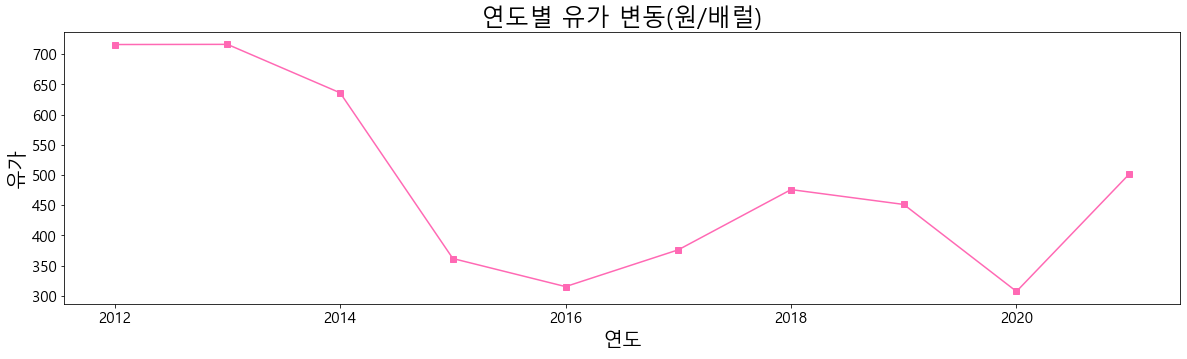

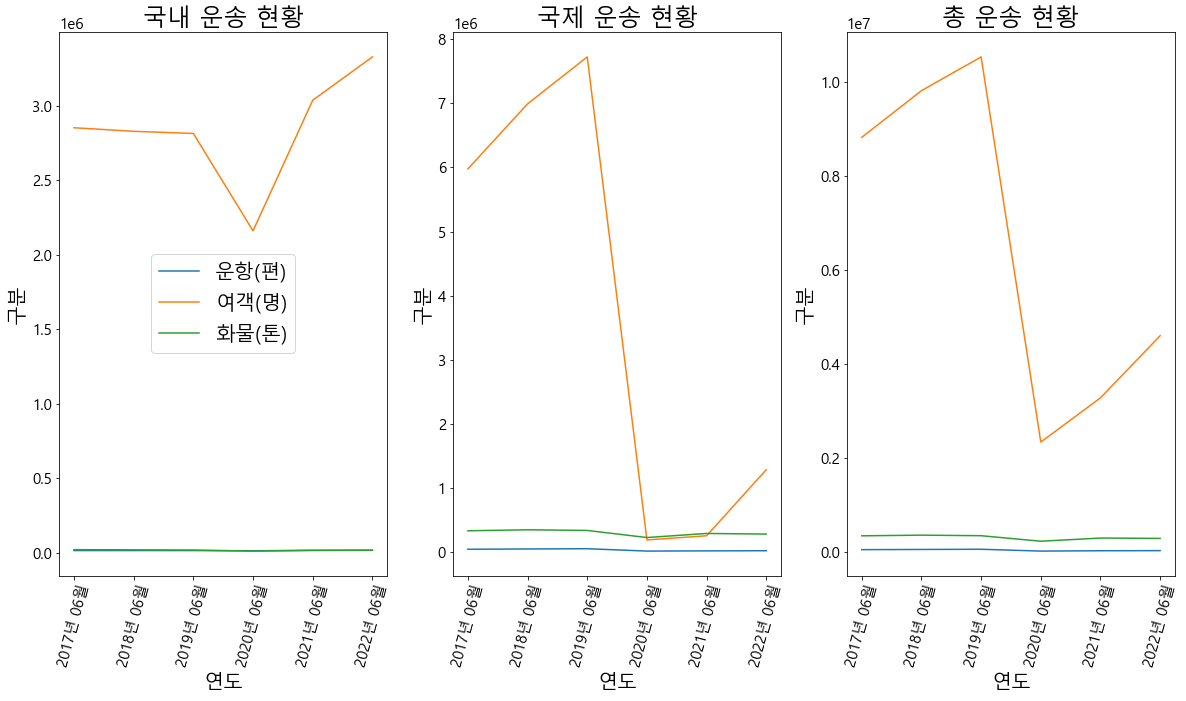

In [82]:
plt.figure(figsize=(20, 5))
plt.plot(b, o1, 'hotpink', marker='s', label='화물(톤)')
plt.title('연도별 유가 변동(원/배럴)')
plt.ylabel('유가', fontsize='20')
plt.xlabel('연도', fontsize='20')
# plt.show()

fig, axes = plt.subplots(1,3, figsize=(20,10))

plt.subplot(1,3,1)
# plt.figure(figsize=(15, 8))
plt.plot(inter_air_trans_2_01)
plt.title('국내 운송 현황')
plt.ylabel('구분', fontsize='20')
plt.xlabel('연도', fontsize='20')
plt.xticks(rotation=75)
plt.legend(bbbb, fontsize=20, loc='center')

plt.subplot(1,3,2)
plt.plot(inter_air_trans_2_02)
plt.title('국제 운송 현황')
plt.ylabel('구분', fontsize='20')
plt.xlabel('연도', fontsize='20')
plt.xticks(rotation=75)
# plt.legend(aaa, fontsize=15)

plt.subplot(1,3,3)
plt.plot(inter_air_trans_2_03)
plt.title('총 운송 현황')
plt.ylabel('구분', fontsize='20')
plt.xlabel('연도', fontsize='20')
plt.xticks(rotation=75)
# plt.legend(aaa, fontsize=15)
plt.show()

## 분석

### 1) 원유
### <span style='color:red'> 상승 패턴을 그리던 와중에 국제 정세로 인해 그 속도가 빨라짐   </span>

- 12년부터 하락, 14년부터는 2년 주기로 상승과 하락을 반복하고 있었음
- 코로나나 러시아발 전쟁 등의 국제 정세에 의해 상승하는 폭이 급격히 커진 것이 문제  
- 즉, 비슷한 패턴으로 흘렀을 경우, 현재와 마찬가지로 유가 가격은 상승하였을 가능성이 있으나  
여러 특이사항이 발생하면서 급격히 상승하고 있는 것으로 보임.


- 상승 요인 : 코로나가 잠잠해지면서 reopening 산업들의 복귀 (여행, 화장품 등 각종 산업) -> 석유 수요 증가  
러시아발 전쟁으로 원유 수급에 대한 불안감으로 유가 급등  


- 현재 국가적 차원에서 기름값을 잡기 위한 정책적 지원을 유가를 낮추기 위한 시도도 있었고,  
전쟁과 코로나의 여파가 상대적으로 감소세에 들면서 유가가 조금씩은 감소하고 있는 추세로 보임

### 2) 운송현황
### <span style='color:red'> 국제 여객의 경우를 제외하면 모두 회복세에 있음   </span>
### <span style='color:red'> 아직까지는 코로나 등 국가 정세의 영향이 더 큰 것으로 보임   </span>


- 국내/국제/총  
    -> 운항과 화물은 대부분 일정하게 유지(수치상 20년을 기점으로 상승하면서 회복중)    
    -> 여객의 경우, 유가와 비슷한 패턴을 보임.  
    
    
- 하지만 국내 여객의 경우, 코로나 이전의 여객 인원을 웃도는 수준으로 회복 중에 있으나 (2년 새 회복)  
국제적으로는 코로나 이전의 상태로 회복되기까지는 상당한 시간이 걸릴 것으로 예상됨 (2년 새 반절도 회복 못함)  
=> 중국의 경우 대도시를 봉쇄하는 등의 국가마다의 사정이 다르기 때문에 자명한 일


## < 그래프 분석 >
## 1) 항공사  

### (1) 유가의 변동과 여객/화물/운항의 변동

In [83]:
inter_air_trans_1 = inter_air_trans
inter_air_trans_1

,연도,여객(명),화물(톤),운항(회),유가(원/배럴),숙박 업체수(개)
0,2012,47702644,3208780,313726,715.837538,46920
1,2013,50986891,3246253,338988,716.119679,49732
2,2014,56778759,3410742,366485,635.935833,53777
3,2015,61434404,3518772,388008,361.830046,56915
4,2016,73000810,3780908,438856,315.390772,58591
5,2017,76955719,4031516,457099,376.262744,59995
6,2018,85925288,4168783,497089,475.866206,62045
7,2019,90385640,4015987,528243,451.288213,62957
8,2020,14239922,3070993,167211,307.388137,62212
9,2021,3208695,3420163,131442,501.496667,68773


In [84]:
inter_air_trans_1['연도'] = inter_air_trans_1['연도'].astype('str')

In [85]:
b = inter_air_trans_1['연도'].tolist()
x1 = inter_air_trans_1['여객(명)'].tolist()
x2 = inter_air_trans_1['화물(톤)'].tolist()
x3 = inter_air_trans_1['운항(회)'].tolist()
o1 = inter_air_trans_1['유가(원/배럴)'].tolist()

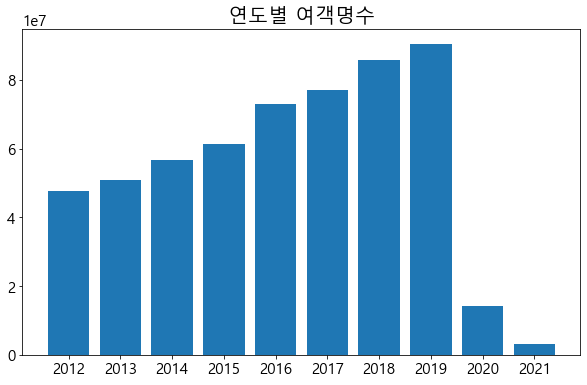

In [86]:
if platform.system() == 'Windows':
    font_name = fm.FontProperties(fname='c:\Windows\Fonts\malgun.ttf').get_name()
    plt.rc('font', family=font_name)
# plt.rc(‘font’, family=‘Malgun Gothic’, size=8) # 간단히 맑은 고딕으로 설정
else:
# MacOS
    plt.rc('font', family='AppleGothic', size=8) # 한글 폰트 사용 For Mac OS

plt.figure(figsize=(10, 6))
plt.title('연도별 여객명수', fontsize=20)
plt.bar(b, x1)
plt.show()

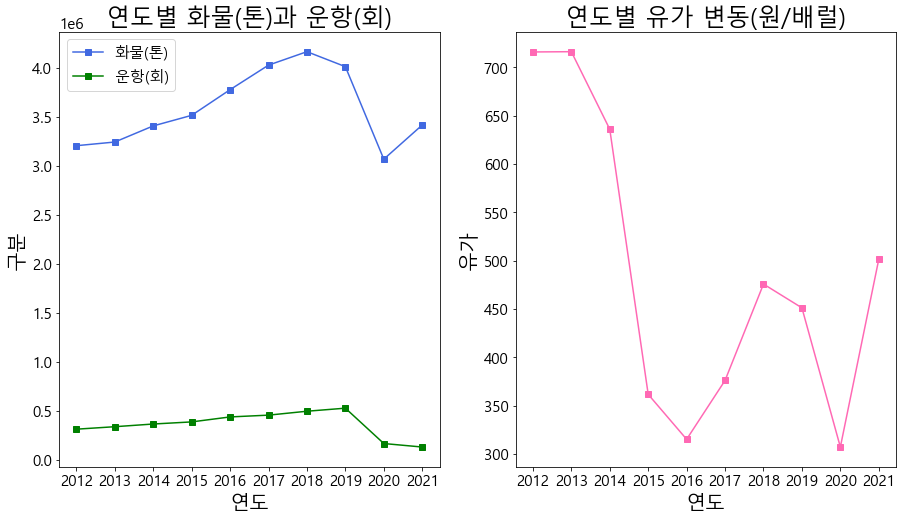

In [97]:
fig, axes = plt.subplots(1,2, figsize=(15,8))

plt.subplot(1,2,1)
plt.plot(b, x2, 'royalblue', marker='s', label='화물(톤)')
plt.plot(b, x3, 'green', marker='s', label='운항(회)')
plt.rc('font', size=20)   
plt.ylabel('구분', fontsize='20')
plt.xlabel('연도', fontsize='20')
plt.title('연도별 화물(톤)과 운항(회)')
plt.rcParams['axes.unicode_minus'] = False
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=20)
plt.legend(fontsize=15)
# plt.show()

plt.subplot(1,2,2)
plt.plot(b, o1, 'hotpink', marker='s', label='화물(톤)')
plt.title('연도별 유가 변동(원/배럴)')
plt.ylabel('유가', fontsize='20')
plt.xlabel('연도', fontsize='20')
plt.show()

## 분석

### 1) 연도별 여객
### <span style='color:red'> 2019-2020(하락), 2020-2021(상승) 유가 변동과 비슷한 추세   </span>
- 2019년 이후, 직격탄을 맞은 항공기의 운항이 확실하게 보이는 막대 그래프 (코로나 때문)
- 2021년 데이터가 조사기간이 6월까지였기 때문에 수치표시가 부정확. 하지만 위에서 살펴보았던 그래프로 보아 20년보다 상승할 것으로 보임

### 2) 화물과 운항
### <span style='color:red'> 화물 : 2012-2016(상반됨), 2020-2021(상승) 유가 영향력이 낮다고 보여짐   </span>
### <span style='color:red'> 운항 : 2019-2020(하락), 2020-2021(상승) 유가 변동과 비슷한 추세   </span>

- 화물 : 2012-2016년도까지 상반된 흐름, 2019년도부터 현재 유가 상승하는 모습과 비슷하게 흐르는 것으로 봐서 유가의 영향을 많이 받지 않는 것으로 보임. (여느때처럼 같았다면 유가 상승하면서 화물이 줄어들었어야 했음)  
따라서, 유가의 영향보다는 코로나나 전쟁의 영향으로 인한 원인이 더 많이 발생했을 것으로 판단됨


- 운항 : 여객과 같은 흐름으로 생각. 여객과 화물 운항을 모두 포함하는 수치인데, 최종적으로 하락선을 그리는 것으로 보아 증가하는 화물 운항보다 감소한 화물 운항 횟수가 컸던 것으로 보임


## 2) 관광업

### (1) 업종별 사업체수/종사자수/매출액의 변동

In [88]:
inter_air_trans_1

,연도,여객(명),화물(톤),운항(회),유가(원/배럴),숙박 업체수(개)
0,2012,47702644,3208780,313726,715.837538,46920
1,2013,50986891,3246253,338988,716.119679,49732
2,2014,56778759,3410742,366485,635.935833,53777
3,2015,61434404,3518772,388008,361.830046,56915
4,2016,73000810,3780908,438856,315.390772,58591
5,2017,76955719,4031516,457099,376.262744,59995
6,2018,85925288,4168783,497089,475.866206,62045
7,2019,90385640,4015987,528243,451.288213,62957
8,2020,14239922,3070993,167211,307.388137,62212
9,2021,3208695,3420163,131442,501.496667,68773


In [89]:
x4 = inter_air_trans_1['숙박 업체수(개)'].tolist()

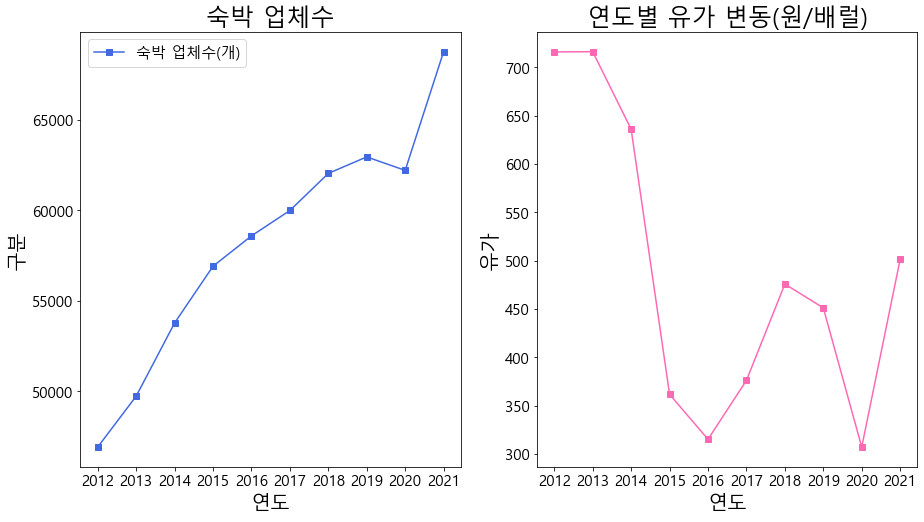

In [90]:
fig, axes = plt.subplots(1,2, figsize=(15,8))

plt.subplot(1,2,1)
plt.plot(b, x4, 'royalblue', marker='s', label='숙박 업체수(개)')
plt.rc('font', size=20)   
plt.ylabel('구분', fontsize='20')
plt.xlabel('연도', fontsize='20')
plt.title('숙박 업체수')
plt.rc('xtick', labelsize=15)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=15)
plt.rc('axes', labelsize=20)
plt.legend(fontsize=15)
# plt.show()

plt.subplot(1,2,2)
plt.plot(b, o1, 'hotpink', marker='s', label='화물(톤)')
plt.title('연도별 유가 변동(원/배럴)')
plt.ylabel('유가', fontsize='20')
plt.xlabel('연도', fontsize='20')
plt.show()

### 분석
### <span style='color:red'> 숙박 업체수는 유가와 관계없이 지속적인 상승을 하는 것으로 봐서 크게 연관성이 없는 것으로 판단됨   </span>

### (2) 업종별 사업체수/종사자수/매출액의 변동

In [91]:
# 업종별 사업체수
sightseeing_01 = sightseeing.iloc[0:20:3]
sightseeing_01

# 업종별 종사자수
sightseeing_02 = sightseeing.iloc[1:20:3]
sightseeing_02

# 업종별 매출액(억원)
sightseeing_03 = sightseeing.iloc[2:20:3]
sightseeing_03

,업종,구분,2016,2017,2018,2019,2020
2,여행업,매출액(억원),76427,81134,84622,86271,4354
5,관광숙박업,매출액(억원),82683,84112,76644,83628,39613
8,관광객 이용시설업,매출액(억원),8852,11039,10207,10837,6515
11,국제회의업,매출액(억원),18377,17715,13033,15273,3837
14,카지노업,매출액(억원),29033,27303,30254,29121,10413
17,유원시설업,매출액(억원),19292,20333,19709,21337,5569


In [92]:
sightseeing_01.drop(['구분'],axis=1, inplace=True)
sightseeing_02.drop(['구분'],axis=1, inplace=True)
sightseeing_03.drop(['구분'],axis=1, inplace=True)

C:\Users\ahasu\AppData\Local\Temp\ipykernel_1688\2419931985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sightseeing_01.drop(['구분'],axis=1, inplace=True)
C:\Users\ahasu\AppData\Local\Temp\ipykernel_1688\2419931985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sightseeing_02.drop(['구분'],axis=1, inplace=True)
C:\Users\ahasu\AppData\Local\Temp\ipykernel_1688\2419931985.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sight

In [93]:
# 컬럼명 수정
sightseeing_01 = sightseeing_01.rename({'업종':'연도'}, axis=1)
sightseeing_02 = sightseeing_02.rename({'업종':'연도'}, axis=1)
sightseeing_03 = sightseeing_03.rename({'업종':'연도'}, axis=1)

In [94]:
# 행, 열 전환으로 연도를 인덱스로 지정
sightseeing_01 = sightseeing_01.set_index('연도').T
sightseeing_02 = sightseeing_02.set_index('연도').T
sightseeing_03 = sightseeing_03.set_index('연도').T

In [95]:
# 그래프를 그리기 위해 해당 컬럼을 리스트에 담기
aaa = sightseeing_01.columns.tolist()
bbb = sightseeing_02.columns.tolist()
ccc = sightseeing_03.columns.tolist()

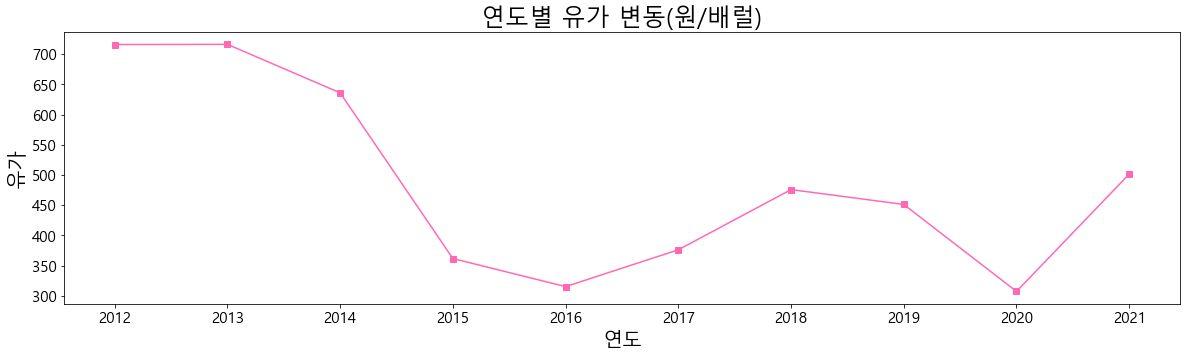

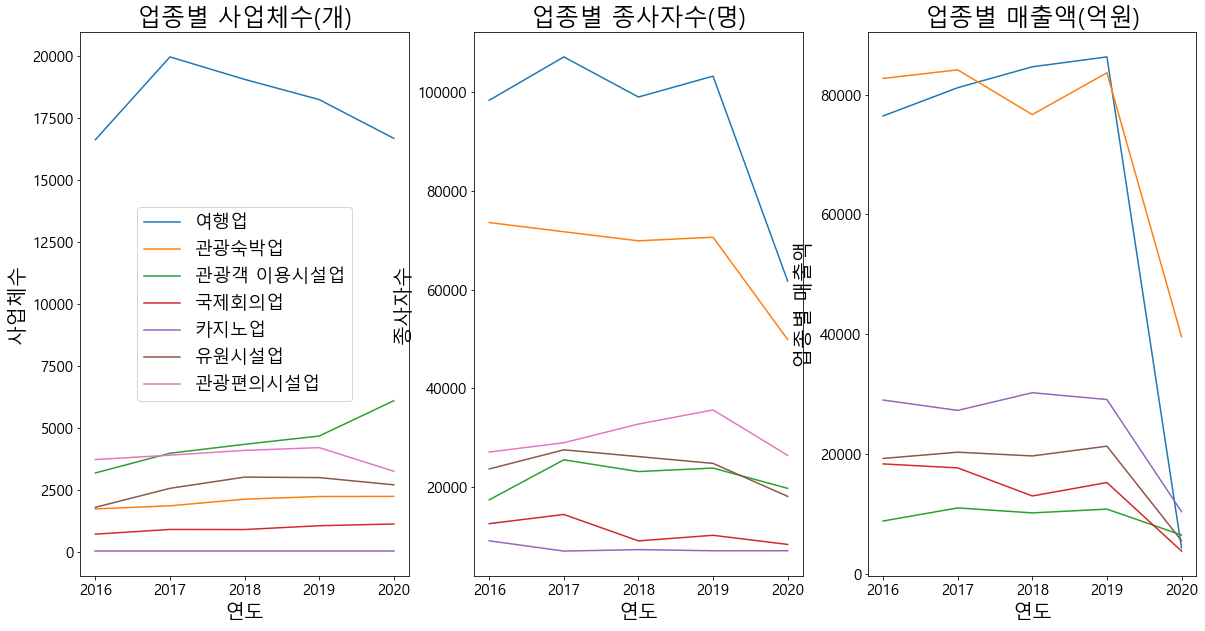

In [96]:
plt.figure(figsize=(20, 5))
plt.plot(b, o1, 'hotpink', marker='s', label='화물(톤)')
plt.title('연도별 유가 변동(원/배럴)')
plt.ylabel('유가', fontsize='20')
plt.xlabel('연도', fontsize='20')
# plt.show()

fig, axes = plt.subplots(1,3, figsize=(20,10))

plt.subplot(1,3,1)
# plt.figure(figsize=(15, 8))
plt.plot(sightseeing_01)
plt.title('업종별 사업체수(개)')
plt.ylabel('사업체수', fontsize='20')
plt.xlabel('연도', fontsize='20')
plt.legend(aaa, fontsize=18, loc='center')

plt.subplot(1,3,2)
plt.plot(sightseeing_02)
plt.title('업종별 종사자수(명)')
plt.ylabel('종사자수', fontsize='20')
plt.xlabel('연도', fontsize='20')
# plt.legend(aaa, fontsize=15)

plt.subplot(1,3,3)
plt.plot(sightseeing_03)
plt.title('업종별 매출액(억원)')
plt.ylabel('업종별 매출액', fontsize='20')
plt.xlabel('연도', fontsize='20')
# plt.legend(aaa, fontsize=15)
plt.show()

### 분석
### <span style='color:red'> 아직까지는 코로나, 전쟁 등 국가 정세의 영향이 더 큰 것으로 보임   </span>
### <span style='color:red'> 하지만, 유가가 하락세에 영향을 미치는 것은 확실함 (기울기 변화)   </span>
- 대부분의 지표들이 2017년도 이후 하락하기 시작했고, 2019년도 코로나 이후 부터는 모든 지표들이 급격하게 하락하기 시작함
- 반면, 유가의 경우 17-20년(상승과 하락), 21년(격급한 상승)의 모습을 보이고 있음
=> '사업체'의 경우, 인원을 감축하는 과정에서 조업가능한 마지막까지 버티는 과정을 통해 감소하는 기울기가 '종사자수'보다 완만하기는 하지만 결국 하락하는 모습을 보임

# 결론
- 유가 상승과 연관되어 있는 모습은 볼 수 있었지만, 선후 관계를 따지기는 어려운 경우가 많았다.
- 즉, 상관관계는 있으나, 인과관계는 밝히기 어려운 경향들이 많았다.
- 코로나나 러시아발 전쟁 등의 너무 큰 event들이 많기 때문에, 조금 더 정밀한 분석이 필요할 것으로 보입니다.